# CSE527 Homework4 - Part 2 (60 points)
**Due date: 23:59 on Dec 3, 2024**

---
In this semester, we will use Google Colab for the assignments, which allows us to utilize resources that some of us might not have in their local machines such as GPUs. You will need to use your Stony Brook (*.stonybrook.edu) account for coding and Google Drive to save your results.

## Google Colab Tutorial
---
Go to https://colab.research.google.com/notebooks/, you will see a tutorial named "Welcome to Colaboratory" file, where you can learn the basics of using google colab.

Settings used for assignments: ***Edit -> Notebook Settings -> Runtime Type (Python 3)***.


## Local Machine Prerequisites
---
Since we are using Google Colab, all the code is run on the server environment where lots of libraries or packages have already been installed. In case of missing
 libraries or if you want to install them in your local machine, below are the links for installation.
* **Install Python 3.6**: https://www.python.org/downloads/ or use Anaconda (a Python distribution) at https://docs.continuum.io/anaconda/install/. Below are some materials and tutorials which you may find useful for learning Python if you are new to Python.
  - https://docs.python.org/3.6/tutorial/index.html
  - https://www.learnpython.org/
  - http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html
  - http://www.scipy-lectures.org/advanced/image_processing/index.html


* **Install Python packages**: install Python packages: `numpy`, `matplotlib`, `opencv-python` using pip, for example:
```
pip install numpy matplotlib opencv-python
```
	Note that when using “pip install”, make sure that the version you are using is python3. Below are some commands to check which python version it uses in you machine. You can pick one to execute:
  
```  
    pip show pip

    pip --version

    pip -V

```

Incase of wrong version, use pip3 for python3 explictly.

* **Install Jupyter Notebook**: follow the instructions at http://jupyter.org/install.html to install Jupyter Notebook and familiarize yourself  with it. *After you have installed Python and Jupyter Notebook, please open the notebook file 'HW1.ipynb' with your Jupyter Notebook and do your homework there.*

## Description
---
In this homework you will experiment with SIFT features for scene matching and object recognition. You will work with the SIFT tutorial and code from the University of Toronto. In the compressed homework file, you will find the tutorial document (tutSIFT04.pdf) and a paper from the International Journal of Computer Vision (ijcv04.pdf) describing SIFT and object recognition. Although the tutorial document assumes matlab implemention, you should still be able to follow the technical details in it. In addition, you are **STRONGLY** encouraged to read this paper unless you’re already quite familiar with matching and recognition using SIFT.


## Using SIFT in OpenCV 3.x.x in Local Machine
---
Feature descriptors like SIFT and SURF are no longer included in OpenCV since version 3. This section provides instructions on how to use SIFT for those who use OpenCV 3.x.x. If you are using OpenCV 2.x.x then you are all set, please skip this section. Read this if you are curious about why SIFT is removed https://www.pyimagesearch.com/2015/07/16/where-did-sift-and-surf-go-in-opencv-3/.

**We strongly recommend you to use SIFT methods in Colab for this homework**, the details will be described in the next section.

However, if you want to use SIFT in your local machine, one simple way to use the OpenCV in-built function `SIFT` is to switch back to version 2.x.x, but if you want to keep using OpenCV 3.x.x, do the following:
1. uninstall your original OpenCV package
2. install opencv-contrib-python using pip (pip is a Python tool for installing packages written in Python), please find detailed instructions at https://pypi.python.org/pypi/opencv-contrib-python

After you have your OpenCV set up, you should be able to use `cv2.xfeatures2d.SIFT_create()` to create a SIFT object, whose functions are listed at http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html

## Using SIFT in OpenCV 3.x.x in Colab (RECOMMENDED)
---
The default version of OpenCV in Colab is 4.8.0 as of Nov 2023. It also has opencv contrib installed and we can use SIFT method directly without any error. However this was not the case previously and students had to install opencv-contrib manually.  

 You should be able to use use `cv2.xfeatures2d.SIFT_create()` to create a SIFT object, whose functions are listed at http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html

## Some Resources
---
In addition to the tutorial document, the following resources can definitely help you in this homework:
- http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
- http://docs.opencv.org/3.1.0/da/df5/tutorial_py_sift_intro.html
- http://docs.opencv.org/3.0-beta/modules/xfeatures2d/doc/nonfree_features.html?highlight=sift#cv2.SIFT
- http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html

In [1]:
# Run this if you are using local (Not tested)
# pip install the OpenCV version from 'contrib'
# opencv-contrib-python==4.8.0.76
# opencv-python==4.8.0.76

In [2]:
# import packages here
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
print(cv2.__version__) # verify OpenCV version
import os

4.10.0


## Problem 1: Match transformed images using SIFT features
{10 points} You will transform a given image, and match it back to the original image using SIFT keypoints.

- **Step 1**. Use the function from SIFT class to detect keypoints from the given image. Plot the image with keypoints scale and orientation overlaid.

- **Step 2**. Rotate your image clockwise by 45 degrees with the `cv2.warpAffine` function. Extract SIFT keypoints for this rotated image and plot the rotated picture with keypoints scale and orientation overlaid just as in step 1.

- **Step 3**. Match the SIFT keypoints of the original image and the rotated imag using the `knnMatch` function in the `cv2.BFMatcher` class. Discard bad matches using the ratio test proposed by D.Lowe in the SIFT paper. Use **0.1** as the ratio in this homework. Note that this is for display purpose only. Draw the filtered good keypoint matches on the image and display it. The image you draw should have two images side by side with matching lines across them.

- **Step 4**. Use the RANSAC algorithm to find the affine transformation from the rotated image to the original image. You are not required to implement the RANSAC algorithm yourself, instead you could use the `cv2.findHomography` function (set the 3rd parameter `method` to `cv2.RANSAC`) to compute the transformation matrix. Transform the rotated image back using this matrix and the `cv2.warpPerspective` function. Display the recovered image.

-  You might have noticed that the rotated image from step 2 is cropped. Try rotating the image without any cropping.

Hints: In case of too many matches in the output image, use the ratio of 0.1 to filter matches.

The image is a duplicate of *Table in front of window* by Pablo Picasso. See https://www.pablopicasso.org/ for more stories about Pablo Picasso and https://www.wikiart.org/en/pablo-picasso/table-in-front-of-window-1919 for more information about this work.


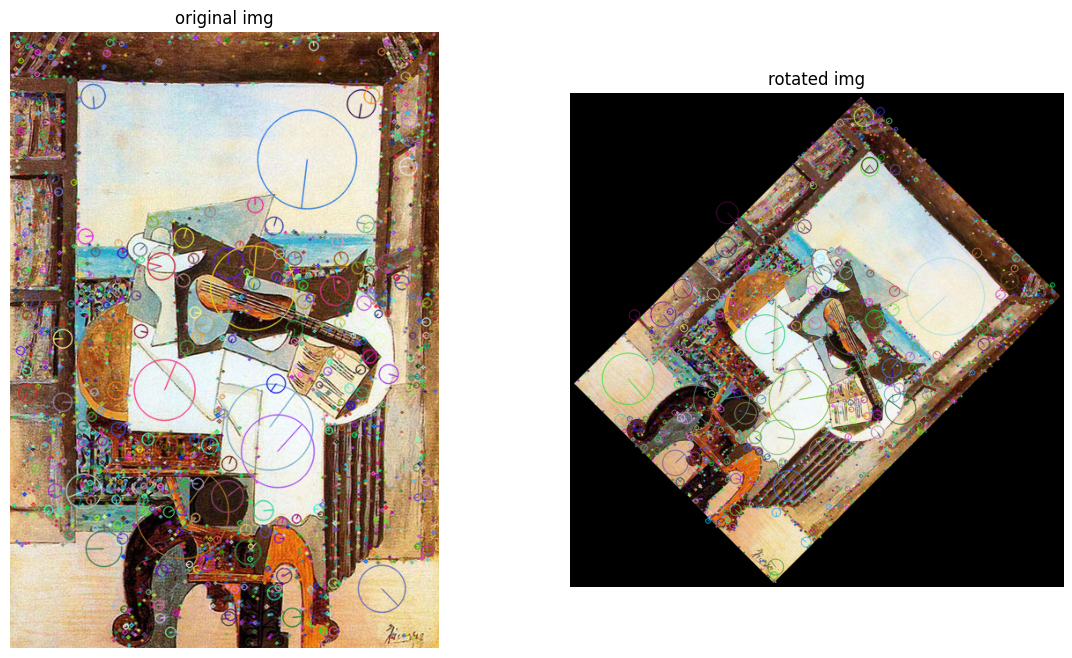

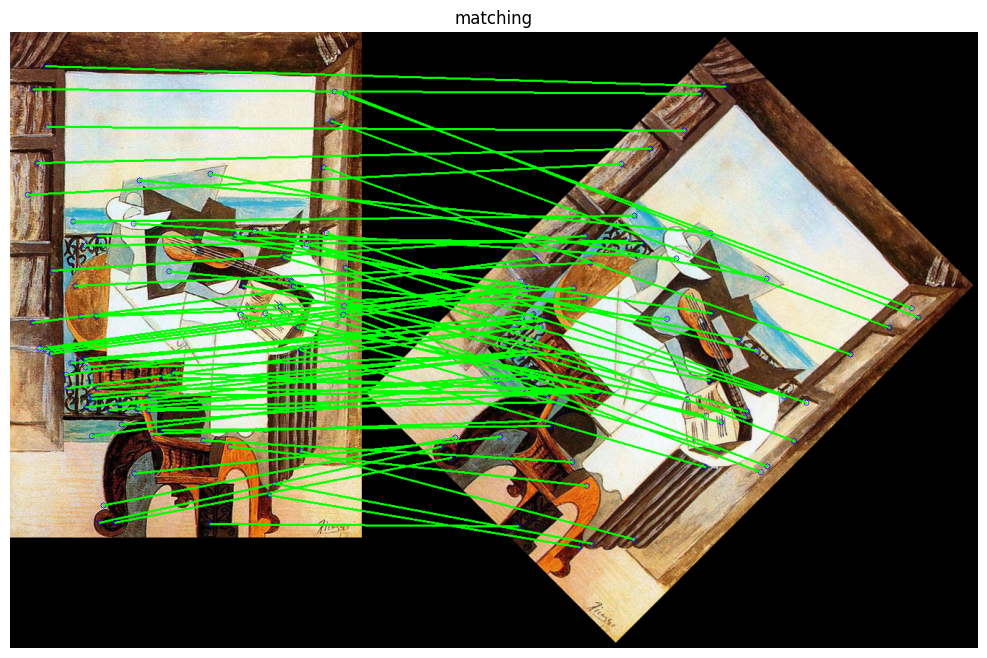

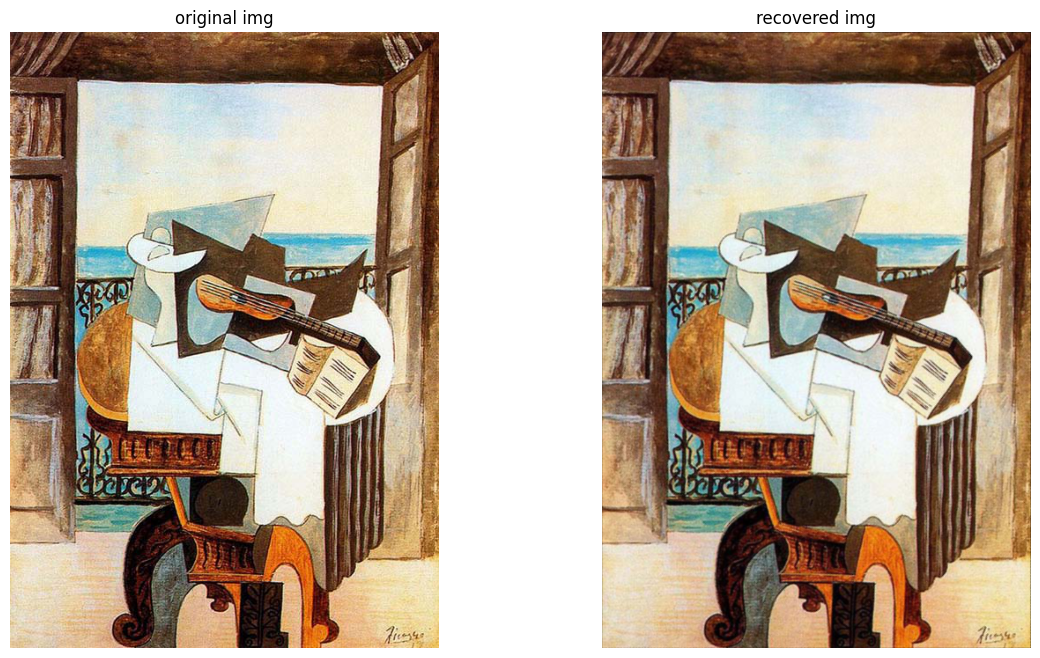

In [3]:
from re import M
def drawMatches(img1, kp1, img2, kp2, matches):
    """
    My own implementation of cv2.drawMatches as OpenCV 2.4.9
    does not have this function available but it's supported in
    OpenCV 3.0.0

    This function takes in two images with their associated
    keypoints, as well as a list of DMatch data structure (matches)
    that contains which keypoints matched in which images.

    An image will be produced where a montage is shown with
    the first image followed by the second image beside it.

    Keypoints are delineated with circles, while lines are connected
    between matching keypoints.

    img1,img2 - Grayscale or Color images
    kp1,kp2 - Detected list of keypoints through any of the OpenCV keypoint
              detection algorithms
    matches - A list of matches of corresponding keypoints through any
              OpenCV keypoint matching algorithm
    """

    # Create a new output image that concatenates the two images together
    # (a.k.a) a montage
    rows1 = img1.shape[0]
    cols1 = img1.shape[1]
    rows2 = img2.shape[0]
    cols2 = img2.shape[1]

    # Create the output image
    # The rows of the output are the largest between the two images
    # and the columns are simply the sum of the two together
    # The intent is to make this a colour image, so make this 3 channels
    out = np.zeros((max([rows1,rows2]),cols1+cols2,3), dtype='uint8')

    # Place the first image to the left
    # stack if the inputs are gray images
    if len(img1.shape) == 2:
      img1 = np.dstack([img1, img1, img1])
    if len(img2.shape) == 2:
      img2 = np.dstack([img2, img2, img2])

    out[:rows1,:cols1, :] = img1

    # Place the next image to the right of it
    out[:rows2,cols1:, :] = img2

    # For each pair of points we have between both images
    # draw circles, then connect a line between them
    for mat in matches:
        # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        (x1,y1) = kp1[img1_idx].pt
        (x2,y2) = kp2[img2_idx].pt

        # Draw a small circle at both co-ordinates
        # radius 4
        # colour blue
        # thickness = 1
        cv2.circle(out, (int(x1),int(y1)), 4, (255, 0, 0), 1)
        cv2.circle(out, (int(x2)+cols1,int(y2)), 4, (255, 0, 0), 1)

        # Draw a line in between the two points
        # thickness = 1
        # colour blue
        cv2.line(out, (int(x1),int(y1)), (int(x2)+cols1,int(y2)), (0,255,0), 2)
    # Also return the image if you'd like a copy
    return out

# Read image
img_input = cv2.imread('source_images/Picasso.png')

##########--WRITE YOUR CODE HERE--##########
# initiate SIFT detector
# sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp, des = sift.detectAndCompute(img_input, None)

# Draw keypoints on the image
# use cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS flag
res1 = cv2.drawKeypoints(img_input, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# rotate image
# use cv2.warpAffine to rotate image
# enlarge the image to avoid cropping
c1 = img_input.shape[1] // 2, img_input.shape[0] // 2
diag = np.ceil((img_input.shape[0] ** 2 + img_input.shape[1] ** 2) ** 0.5).astype(int)
c2 = diag // 2, diag // 2
# compute and adjust rotation matrix
R = cv2.getRotationMatrix2D(c1, -45, 1)
R[0, 2] += c2[0] - c1[0]
R[1, 2] += c2[1] - c1[1]
img_input_rot = cv2.warpAffine(img_input, R, (diag, diag))

# find the keypoints and descriptors on the rotated image
sift_rot = cv2.SIFT_create()
kp_rot, des_rot = sift_rot.detectAndCompute(img_input_rot, None)

# Draw keypoints on the rotated image
# use cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS flag
res2 = cv2.drawKeypoints(img_input_rot, kp_rot, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

##########-------END OF CODE-------##########

# Plot result images
plt.figure(figsize=(14,8))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB));
plt.title('original img')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB));
plt.title('rotated img')
plt.axis('off')

##########--WRITE YOUR CODE HERE--##########
# compute feature matching
# use the knnMatch function in the cv2.BFMatcher class
bf = cv2.BFMatcher()
matches = bf.knnMatch(des, des_rot, k=2)

# Apply ratio test to keep good matches; ratio=0.1
good = []
for m, n in matches:
    if m.distance < 0.1 * n.distance:
        good.append(m)

# draw matching results with the given drawMatches function
res3 = drawMatches(img_input, kp, img_input_rot, kp_rot, good)

##########-------END OF CODE-------##########

plt.figure(figsize=(14,8))
plt.imshow(cv2.cvtColor(res3, cv2.COLOR_BGR2RGB));
plt.title('matching')
plt.axis('off')

##########--WRITE YOUR CODE HERE--##########
# find perspective transform matrix using RANSAC
# use cv2.findHomography
img_pts = []
img_rot_pts = []
for m in good:
    img_id, img_rot_id = m.queryIdx, m.trainIdx

    img_pts.append(kp[img_id].pt)
    img_rot_pts.append(kp_rot[img_rot_id].pt)

img_pts = np.array(img_pts).reshape(-1, 1, 2).astype(np.float32)
img_rot_pts = np.array(img_rot_pts).reshape(-1, 1, 2).astype(np.float32)
H, mask = cv2.findHomography(img_rot_pts, img_pts, cv2.RANSAC, None)


# mapping rotataed image back with the calculated rotation matrix
# use cv2.warpPerspective
res4 = cv2.warpPerspective(img_input_rot, H, (img_input.shape[1], img_input.shape[0]), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
##########-------END OF CODE-------##########


# plot result images
plt.figure(figsize=(14,8));
plt.subplot(1, 2, 1);
plt.imshow(cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB));
plt.title('original img');
plt.axis('off');

plt.subplot(1, 2, 2);
plt.imshow(cv2.cvtColor(res4, cv2.COLOR_BGR2RGB));
plt.title('recovered img');
plt.axis('off');


## Problem 2: Scene stitching with SIFT features
{20 points} You will match and align between different views of a scene with SIFT features.

Use `cv2.copyMakeBorder` function to pad the center image with zeros into a larger size. Extract SIFT features for all images and go through the same procedures as you did in problem 1. Your goal is to find the affine transformation between the two images and then align one of your images to the other using `cv2.warpPerspective`. Use the `cv2.addWeighted` function (or your own implementation) to blend the aligned images and show the stitched result. Examples can be found at http://docs.opencv.org/trunk/d0/d86/tutorial_py_image_arithmetics.html.
Use parameters **0.5 and 0.5** for alpha blending.

- **Step 1 (10points)**. Compute the transformation from the right image to the center image. Warp the right image with the computed transformation. Stitch the center and right images with alpha blending. Display the SIFT feature matching between the center and right images like you did in problem 1. Display the stitched result (center and right image).

- **Step 2 (5 points)** Compute the transformation from the left image to the stitched image from step 1. Warp the left image with the computed transformation. Stich the left and result images from step 1 with alpha blending. Display the SIFT feature matching between the result image from step 1 and the left image like what you did in problem 1. Display the final stitched result (all three images).

- **Laplacian (5 points)**. Instead of using `cv2.addWeighted` to do the blending, implement Laplacian Pyramids to blend the two aligned images. Tutorials can be found at http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_pyramids/py_pyramids.html. Display the stitched result (center and right image) and the final stitched result (all three images) with laplacian blending instead of alpha blending.

Note that for the resultant stitched image, some might have different intensity in the overlapping and other regions, namely the overlapping region looks brighter or darker than others. To get full credit, the final image should have uniform illumination.

Hints: You need to find the warping matrix between images with the same mechanism from problem 1. You will need as many reliable matches as possible to find a good homography so DO NOT use 0.1 here. A suggested value would be 0.75 in this case.

When you warp the image with cv2.warpPerspective, an important trick is to pass in the correct parameters so that the warped image has the same size with the padded_center image. Once you have two images with the same size, find the overlapping part and do the blending.

The images are the Stony Brook's Student Activities Center from https://www.youvisit.com/tour/panoramas/stonybrook/80175?id=405.

In [4]:
# UTIL FUNCTIONS
# Note: we are using custom functions to support use of a mask in laplacian pyramid creation
# since the image being blended has black missing image regions

from scipy.signal import convolve2d

def create_gaussian_kernel(size, sigma):
    ax = np.arange(-size // 2 + 1, size // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

def custom_gaussian_filter(image, sigma, kernel_size=5, threshold_value=5):
    kernel = create_gaussian_kernel(kernel_size, sigma)
    
    _, mask = cv2.threshold(image.sum(-1), threshold_value, 255, cv2.THRESH_BINARY)
    mask = mask.astype(np.float32) / 255
    
    blurred = np.zeros_like(image, dtype=np.float32)
    norm_mask = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[2]):
        blurred[..., i] = convolve2d(image[..., i] * mask, kernel, mode='same', boundary='symm')
        norm_mask[..., i] = convolve2d(mask, kernel, mode='same', boundary='symm')
        blurred[..., i] /= (norm_mask[..., i] + 1e-6)
    return blurred

def pyr_down(image, sigma=1.0, kernel_size=5, mask=True):
    blurred = custom_gaussian_filter(image, sigma=sigma, kernel_size=kernel_size, threshold_value=5 if mask else 0)
    downsampled = blurred[::2, ::2]
    return downsampled

def pyr_up(image, dstsize):
    upsampled = cv2.resize(image, dstsize, interpolation=cv2.INTER_CUBIC)
    return upsampled


(1024, 1920, 3)
(1344, 2848, 3)
(1024, 2048, 3)


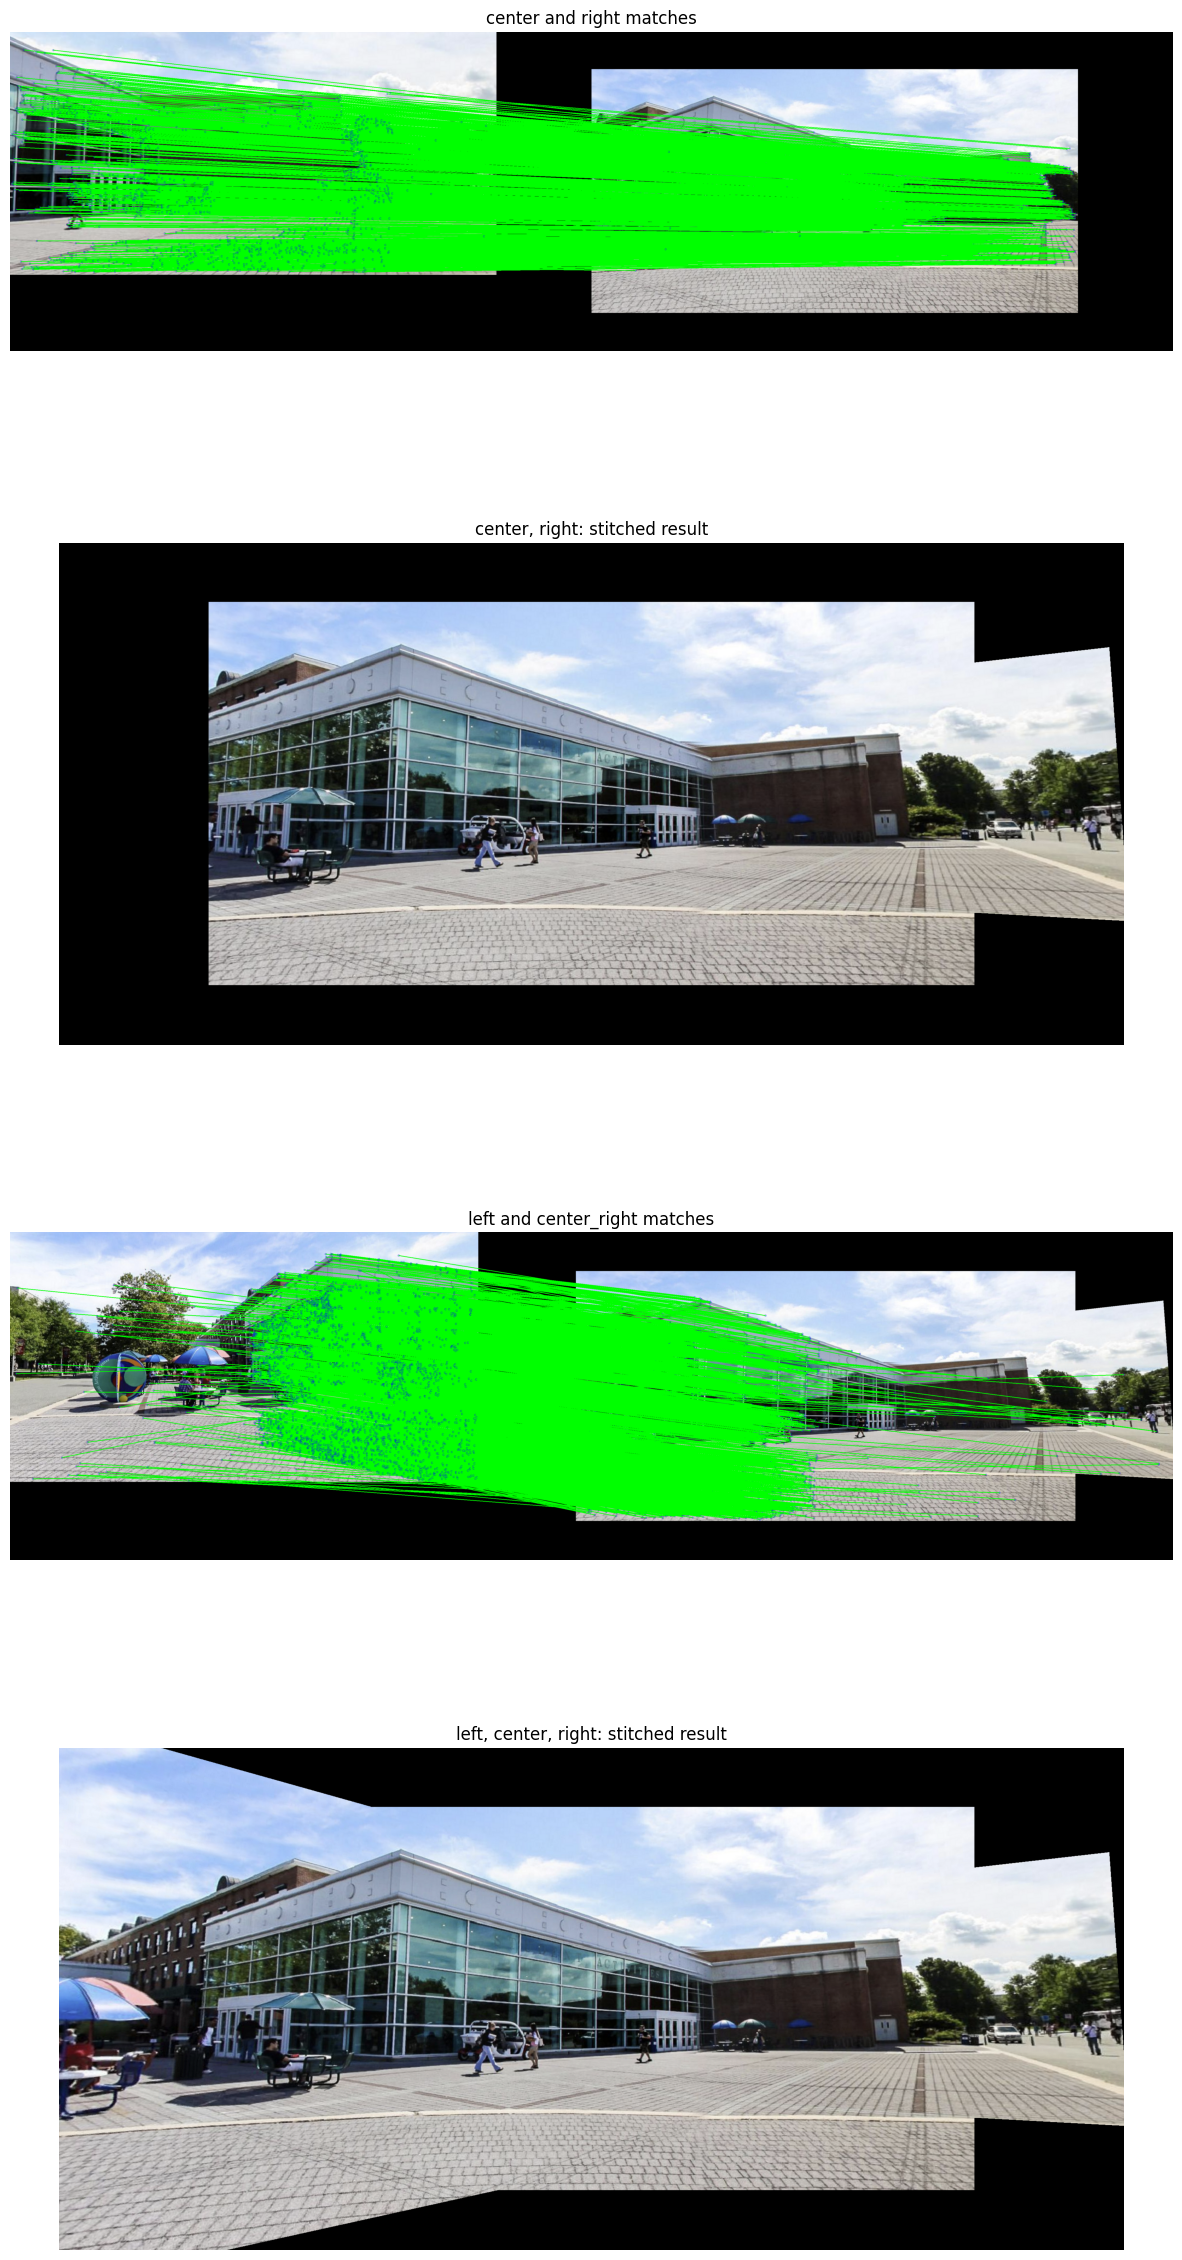

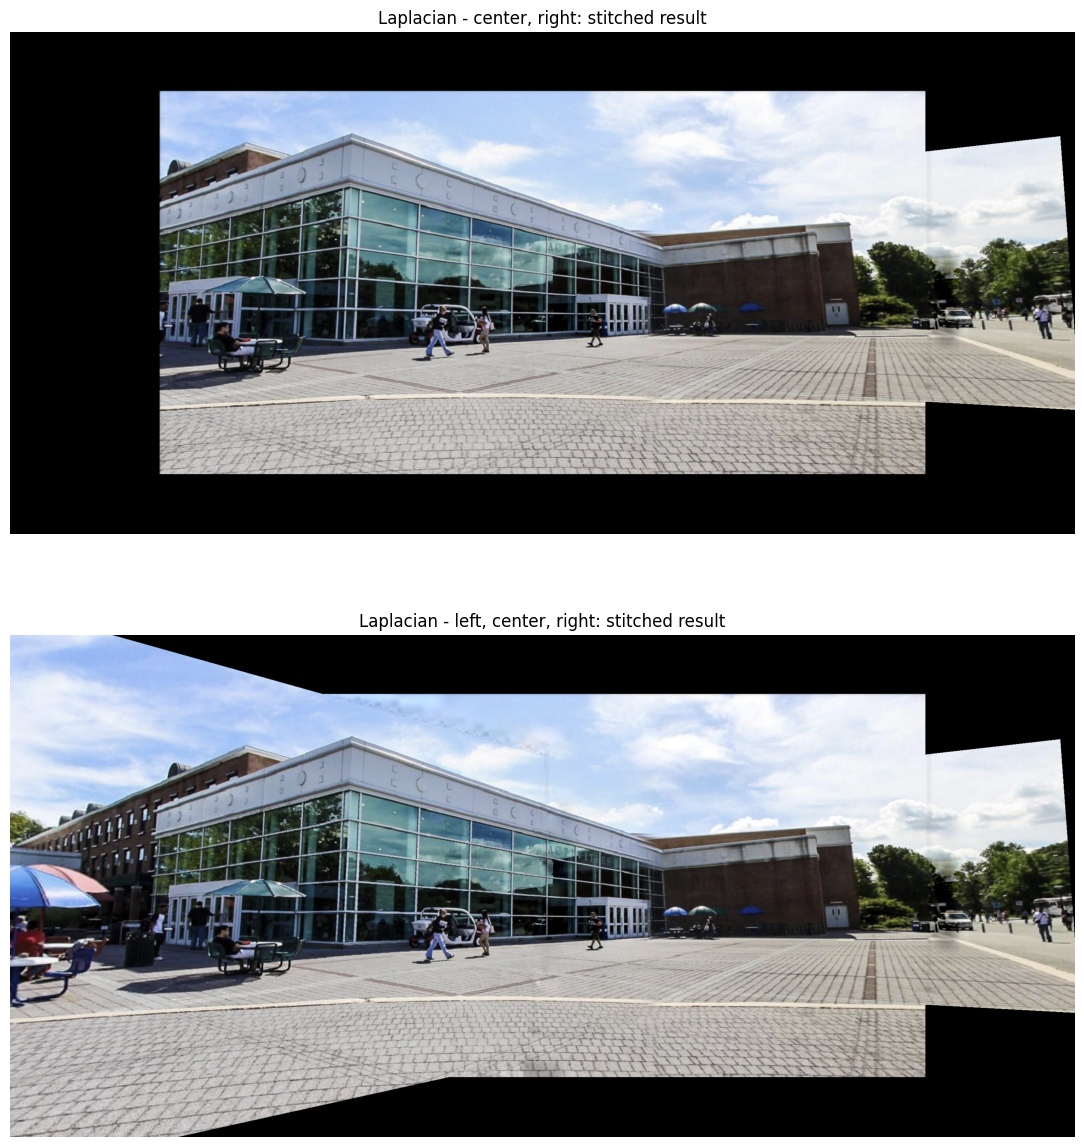

In [5]:
imgCenter = cv2.imread('source_images/sac_center.png', cv2.IMREAD_COLOR)
imgRight  = cv2.imread('source_images/sac_r.png', cv2.IMREAD_COLOR)
imgLeft   = cv2.imread('source_images/sac_l.png', cv2.IMREAD_COLOR)

# initalize the stitched image as the center image
imgCenter = cv2.copyMakeBorder(imgCenter,160,160,400,400,cv2.BORDER_CONSTANT)
print(imgLeft.shape)
print(imgCenter.shape)
print(imgRight.shape)

# blend two images
def alpha_blend(img_A, img_B):
    # Implement alpha_blending, using 0.5 and 0.5 for alphas
    ##########--WRITE YOUR CODE HERE--##########
    
    # Grayscale Image
    gray_img_A = cv2.cvtColor(img_A, cv2.COLOR_BGR2GRAY)
    gray_img_B = cv2.cvtColor(img_B, cv2.COLOR_BGR2GRAY)

    # Mask for alpha blending
    _, maskA = cv2.threshold(gray_img_A, 5, 255, cv2.THRESH_BINARY)
    _, maskB = cv2.threshold(gray_img_B, 5, 255, cv2.THRESH_BINARY)
    gray_mask = maskA & maskB
    rgb_mask = gray_mask[:, :, None]

    # Brightness rescaling adjustment
    brightness_factor = np.average(gray_img_A, weights=gray_mask) / np.average(gray_img_B, weights=gray_mask)
    adjusted_img_B = cv2.convertScaleAbs(img_B, alpha=brightness_factor, beta=0)

    # Alpha blending
    alpha = 0.5
    blended = cv2.addWeighted(img_A, alpha, adjusted_img_B, 1 - alpha, 0)
    blended = np.where(rgb_mask == 0, np.maximum(img_A, adjusted_img_B), blended).astype(np.uint8)
    ##########-------END OF CODE-------##########
    return blended #, img_A, adjusted_img_B #, (rgb_mask, maskA, maskB)

def Laplacian_Blending(img_A, img_B, mask, num_levels=5):
    # Implement Laplacian_blending
    # assume mask is float32 [0,1], it has the same size to img_A and img_B
    # the mask indicates which parts of img_A or img_B are blended together
    # num_levels is the number of levels in the pyramid
    assert img_A.shape==img_B.shape
    assert img_A.shape==mask.shape
    ##########--WRITE YOUR CODE HERE--##########

    # Creating an binary image union mask to keep empty image region
    gray_img_A = cv2.cvtColor(img_A, cv2.COLOR_BGR2GRAY)
    gray_img_B = cv2.cvtColor(img_B, cv2.COLOR_BGR2GRAY)
    _, maskA = cv2.threshold(gray_img_A, 5, 255, cv2.THRESH_BINARY)
    _, maskB = cv2.threshold(gray_img_B, 5, 255, cv2.THRESH_BINARY)
    union_mask = cv2.bitwise_or(maskA, maskB)
    union_mask = union_mask[:, :, None].astype(np.float32) / 255
    union_mask = np.tile(union_mask, (1, 1, 3))
    # Creating overlap mask for brightness adjustment
    overlap_mask = cv2.bitwise_and(maskA, maskB)

    # Brightness rescaling adjustment
    brightness_factor = np.average(gray_img_A, weights=overlap_mask) / np.average(gray_img_B, weights=overlap_mask)
    adjusted_img_B = cv2.convertScaleAbs(img_B, alpha=brightness_factor, beta=0)

    # Gaussian pyramid
    gpA = [img_A.astype(np.float32)]
    gpB = [adjusted_img_B.astype(np.float32)]
    gpM = [mask.astype(np.float32)]

    for _ in range(num_levels):
        gpA.append(pyr_down(gpA[-1], mask=False))
        gpB.append(pyr_down(gpB[-1], mask=False))
        # no binary masking is used while creating pyramid since it messes with reconstruction of image
        gpM.append(pyr_down(gpM[-1], mask=False))

    # Laplacian pyramid
    lpA = [gpA[-1]]
    lpB = [gpB[-1]]

    for i in range(num_levels - 1, -1, -1):
        size = (gpA[i].shape[1], gpA[i].shape[0])
        lpA.append(cv2.subtract(gpA[i], pyr_up(gpA[i + 1], dstsize=size)))
        lpB.append(cv2.subtract(gpB[i], pyr_up(gpB[i + 1], dstsize=size)))

    # Blending the images in pyramids
    laplacian_blended = []
    for la, lb, gm in zip(lpA, lpB, gpM[::-1]):
        laplacian_blended.append(la * gm + lb * (1 - gm))

    # Constructing the blended image
    blended = laplacian_blended[0]
    for i in range(1, num_levels + 1):
        size = (laplacian_blended[i].shape[1], laplacian_blended[i].shape[0])
        blended = cv2.add(pyr_up(blended, dstsize=size), laplacian_blended[i])
    blended = blended * union_mask
    blended = np.clip(blended, 0, 255).astype(np.uint8)

    ##########-------END OF CODE-------##########
    return blended

def getTransform(img1, img2, match_count=False, goodness_ratio=0.75):
    ##########--WRITE YOUR CODE HERE--##########
    # compute sift descriptors
    sift1 = cv2.SIFT_create()
    kp1, des1 = sift1.detectAndCompute(img1, None)

    sift2 = cv2.SIFT_create()
    kp2, des2 = sift2.detectAndCompute(img2, None)

    # find all matches
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # apply ratio test, use ratio = 0.75
    good = []
    for m, n in matches:
        if m.distance < goodness_ratio * n.distance:
            good.append(m)

    # draw matches
    img_match = drawMatches(img1, kp1, img2, kp2, good)

    # find perspective transform matrix using RANSAC
    img1_pts = []
    img2_pts = []
    for m in good:
        img1_id, img2_id = m.queryIdx, m.trainIdx
        img1_pts.append(kp1[img1_id].pt)
        img2_pts.append(kp2[img2_id].pt)

    img1_pts = np.array(img1_pts).reshape(-1, 1, 2).astype(np.float32)
    img2_pts = np.array(img2_pts).reshape(-1, 1, 2).astype(np.float32)
    H, mask = cv2.findHomography(img1_pts, img2_pts, cv2.RANSAC, None)

    if match_count:
        return H, len(good)

    ##########-------END OF CODE-------##########
    # H is the perspective transform matrix
    # img_match is the image returned by drawMatches
    return H, img_match

def perspective_warping_alpha_blending(imgCenter, imgLeft, imgRight):
    ##########--WRITE YOUR CODE HERE--##########
    dsize = imgCenter.shape[1], imgCenter.shape[0]

    # Get homography from right to center
    # img_match_cr is your first output
    # call getTransform to get the transformation from the right to the center image
    H1, img_match_cr = getTransform(imgRight, imgCenter)

    # Blend center and right
    # stitched_cr is your second output, returned by alpha_blending
    # call alpha_blending
    aligned_imgRight = cv2.warpPerspective(imgRight, H1, dsize, flags=cv2.INTER_NEAREST, borderMode=cv2.BORDER_CONSTANT)
    stitched_cr = alpha_blend(imgCenter, aligned_imgRight)

    # Get homography from left to stitched center_right
    # img_match_lcr is your third output
    # call getTransform to get the transformation from the left to stitched_cr
    H2, img_match_lcr = getTransform(imgLeft, stitched_cr)

    # Blend left and center_right
    # stitched_lcr is your fourth output, returned by alpha_blending
    # call alpha_blending
    aligned_imgLeft = cv2.warpPerspective(imgLeft, H2, dsize, flags=cv2.INTER_NEAREST, borderMode=cv2.BORDER_CONSTANT)
    stitched_lcr = alpha_blend(stitched_cr, aligned_imgLeft)

    ##########-------END OF CODE-------##########
    return img_match_cr, stitched_cr, img_match_lcr, stitched_lcr

def perspective_warping_laplacian_blending(imgCenter, imgLeft, imgRight):
    ##########--WRITE YOUR CODE HERE--##########
    dsize = imgCenter.shape[1], imgCenter.shape[0]

    # Get homography from right to center
    # call getTransform to get the transformation from the right to the center image
    H1, img_match_cr = getTransform(imgRight, imgCenter)

    # Blend center and right
    # stitched_cr is your first bonus output, returned by Laplacian_blending
    # call Laplacian_blending
    aligned_imgRight = cv2.warpPerspective(imgRight, H1, dsize, flags=cv2.INTER_NEAREST, borderMode=cv2.BORDER_CONSTANT)

    gray_img_A = cv2.cvtColor(imgCenter, cv2.COLOR_BGR2GRAY)
    _, maskA = cv2.threshold(gray_img_A, 5, 255, cv2.THRESH_BINARY)
    mask_cr = maskA[:, :, None].astype(np.float32) / 255
    mask_cr = np.tile(mask_cr, (1, 1, 3))

    # mask_cr = np.concatenate([np.full((1344, 2848-400, 3), 1), np.full((1344, 400, 3), 0)], axis=1)
    stitched_cr = Laplacian_Blending(imgCenter, aligned_imgRight, mask_cr)

    # Get homography from left to stitched center_right
    # call getTransform to get the transformation from the left to stitched_cr
    H2, img_match_lcr = getTransform(imgLeft, stitched_cr)

    # Blend left and center_right
    # stitched_lcr is your second bonus output, returned by Laplacian_blending
    # call Laplacian_blending
    aligned_imgLeft = cv2.warpPerspective(imgLeft, H2, dsize, flags=cv2.INTER_NEAREST, borderMode=cv2.BORDER_CONSTANT)

    gray_img_A = cv2.cvtColor(aligned_imgLeft, cv2.COLOR_BGR2GRAY)
    _, maskA = cv2.threshold(gray_img_A, 5, 255, cv2.THRESH_BINARY)
    mask_lcr = maskA[:, :, None].astype(np.float32) / 255
    mask_lcr = np.tile(mask_lcr, (1, 1, 3))

    # mask_lcr = np.concatenate([np.full((1344, 400, 3), 1), np.full((1344, 2848-400, 3), 0)], axis=1)
    stitched_lcr = Laplacian_Blending(aligned_imgLeft, stitched_cr, mask_lcr)

    ##########-------END OF CODE-------##########
    return img_match_cr, stitched_cr, img_match_lcr, stitched_lcr


img_match_cr, stitched_cr, img_match_lcr, stitched_lcr = perspective_warping_alpha_blending(imgCenter, imgLeft, imgRight)
img_match_cr_lap, stitched_cr_lap, img_match_lcr_lap, stitched_lcr_lap = perspective_warping_laplacian_blending(imgCenter, imgLeft, imgRight)

plt.figure(figsize=(15,30));
plt.subplot(4, 1, 1);
plt.imshow(cv2.cvtColor(img_match_cr, cv2.COLOR_BGR2RGB));
plt.title("center and right matches");
plt.axis('off');
plt.subplot(4, 1, 2);
plt.imshow(cv2.cvtColor(stitched_cr, cv2.COLOR_BGR2RGB));
plt.title("center, right: stitched result");
plt.axis('off');
plt.subplot(4, 1, 3);
plt.imshow(cv2.cvtColor(img_match_lcr, cv2.COLOR_BGR2RGB));
plt.title("left and center_right matches");
plt.axis('off');
plt.subplot(4, 1, 4);
plt.imshow(cv2.cvtColor(stitched_lcr, cv2.COLOR_BGR2RGB));
plt.title("left, center, right: stitched result");
plt.axis('off');
plt.show();

plt.figure(figsize=(15,30));
plt.subplot(4, 1, 1);
plt.imshow(cv2.cvtColor(stitched_cr_lap, cv2.COLOR_BGR2RGB));
plt.title("Laplacian - center, right: stitched result");
plt.axis('off');
plt.subplot(4, 1, 2);
plt.imshow(cv2.cvtColor(stitched_lcr_lap, cv2.COLOR_BGR2RGB));
plt.title("Laplacian - left, center, right: stitched result");
plt.axis('off');

# Stitching a set of images

This is similar to above problem except that you will be stitching a collection of images, without any given order.
You will be given the numpy images in the variable ```image_collection``` and you will have to write your algorithm to stitch and display an image that should resemble below image:
![Example Image](https://drive.google.com/uc?id=1hF6uT-NmWAapnAKxJqKf644Lb6njFh-2)


Please save the output image as  `stitched.png`

 For simplicity of this HW, you will be provided the center_image in ```center_image``` and all others will be at ```image_collection```. The final output will be constructed up on the base image which uses ```center_image``` padded with 1600 pixels each on the top and the bottom edges and 3200 pixels each on the left and the right edges.


Note:
1. You cannot use image stitching libraries availble on the internet. You will have to implement it on your own based on the methods you have alrady implemented above.
2. Try not to manually hardcode the order of images for stitching. (10pts)
3. If you plan to use any graph algorithm, you may use code from internet,but you must cite the URL/library.
4. Please **include comments** where ever possible describing your algorithm.
5. Clean your code before submission to be read by TA. Try not to use too many code blocks, it makes your code less readable.
6. You can use alpha blending for this problem
7. You may experiment on less resolution version of these images to save time. But your submission should be on original resolution images
8. If you come across an artifact caused by cv2's warping method, this graphing (https://www.desmos.com/calculator/cefcmi6pvn  made by Kalyan), may help you.


In [6]:
import os
from tqdm import tqdm
import random
def load_sac_images():
    # DO NOT CHANGE THE ORDER IN THIS LIST
    filelist=['sac_bus.png', 'sac_rb.png', 'sac_libside.png', 'sac_rsky.png', 'sac_r.png', 'sac_sky.png', 'sac_cb.png', 'sac_l.png' ]
    return [cv2.imread(f'source_images/{f}') for f in filelist]

center_image = cv2.imread(f'source_images/sac_center.png')
image_collection = load_sac_images()

#################YOUR CODE STARTS HERE #####################


In [7]:
####################### STITCHING ALGORITHM #######################

# STEP 1: Generate graph of image with edges representing number of sift feature matches between two nodes

# STEP 2: Construct a minimum spanning tree that maximises the no of matches, which should create a stitching order with least error

# STEP 3: Stitch the images to center image until all images are stitched

# ARTIFACT RESOLUTION: This occurs when the image is warped around a vanishing point 
# a) Find disconnected components in the image
# b) Generate sift matches for each component with main image
# c) Stitch the component with highest no of matches

###################################################################

In [8]:
# STEP 1
# Weighted graph of the images is created
# Weight of edges is inversely proportional to number of good matches between two images  

def generate_sift_feature(image_list):
    """Returns a list of sift features for a list of images"""
    sift_list = []
    for image in image_list:
        sift = cv2.SIFT_create()
        kp, des = sift.detectAndCompute(image, None)
        sift_list.append((kp, des))

    return sift_list

def generate_matches(sift1, sift2):
    """Returns a count of 'good' matches for 2 set of sift features"""
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(sift1, sift2, k=2)
    count = sum([1 for m, n in matches if m.distance < 0.75 * n.distance])
    return count

def generate_graph(sift_features):
    n = len(sift_features)
    graph = []

    with tqdm(total=n * (n - 1) // 2, desc="Generating graph") as pbar:
        # Loop for sift features list
        for i in range(0, n):
            for j in range(i + 1, n):
                # generate match count
                count = generate_matches(sift_features[i][1], sift_features[j][1])

                # add bidirectional edge of weight = -count
                w = -count
                graph.append((i, j, w))
                graph.append((j, i, w))
                pbar.update(1)

    return graph

sift_feat = generate_sift_feature([center_image] + image_collection)
graph = generate_graph(sift_feat)

Generating graph: 100%|██████████| 36/36 [00:19<00:00,  1.80it/s]


In [9]:
# STEP 2
# A minimum spanning tree of the above graph indicates the stitching order with least stitching error
# Kruskal's algorithm is used to achieve above

# Code adapted from GeeksforGeeks
# https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/

class Graph: 
	def __init__(self, vertices): 
		self.V = vertices 
		self.graph = [] 

	def addEdge(self, u, v, w): 
		self.graph.append([u, v, w]) 

	def find(self, parent, i): 
		if parent[i] != i: 
			parent[i] = self.find(parent, parent[i]) 
		return parent[i] 

	def union(self, parent, rank, x, y): 
		if rank[x] < rank[y]: 
			parent[x] = y 
		elif rank[x] > rank[y]: 
			parent[y] = x 
		else: 
			parent[y] = x 
			rank[x] += 1

	def KruskalMST(self): 
		result = [] 

		i = 0
		e = 0

		self.graph = sorted(self.graph, 
							key=lambda item: item[2]) 

		parent = [] 
		rank = [] 

		for node in range(self.V): 
			parent.append(node) 
			rank.append(0) 

		while e < self.V - 1: 
			u, v, w = self.graph[i] 
			i = i + 1
			x = self.find(parent, u) 
			y = self.find(parent, v) 
			if x != y: 
				e = e + 1
				result.append([u, v, w]) 
				self.union(parent, rank, x, y)

		minimumCost = 0
		print("Edges in the constructed MST") 
		for u, v, weight in result: 
			minimumCost += weight 
			print("%d -- %d == %d" % (u, v, weight))
		print("Minimum Spanning Tree", minimumCost)

		return result
	
g = Graph(1 + len(image_collection))
for i in graph:
    g.addEdge(*i)

tree = g.KruskalMST()

Edges in the constructed MST
2 -- 7 == -6897
7 -- 8 == -4588
0 -- 2 == -3168
1 -- 5 == -1901
1 -- 2 == -1817
0 -- 6 == -1148
3 -- 8 == -935
2 -- 4 == -607
Minimum Spanning Tree -21061


In [10]:
# ARTIFACT RESOLUTION
def resolve_warping_artifacts(image, main_image):
    # create binary mask of warped image
    _, mask = cv2.threshold(image, 1, 255, cv2.THRESH_BINARY)
    gray_mask = (mask.sum(-1, keepdims=True)/3).astype(np.uint8)

    # Find connected components count
    _, labels = cv2.connectedComponents(gray_mask)

    # return if no multiple components
    if labels.max() == 1:
        return image
    
    # separate the connected components
    image_list = [
        (image * np.stack([(labels == i)] * 3, 2)).astype(np.uint8)
        for i in range(1, labels.max() + 1)
    ]

    # generate features and match count for each component against main_image
    main_sift_feat = generate_sift_feature([main_image.astype(np.uint8)])[0]
    sift_features = generate_sift_feature(image_list)
    count = [
        generate_matches(main_sift_feat[1], sift_feat[1])
        for sift_feat in sift_features
    ]
    count = np.array(count)

    # return image with highest match count
    return image_list[count.argmax()]

In [11]:
# STEP 3: Stitch the images to center image until all images are stitched
main_image = cv2.copyMakeBorder(center_image, 1600, 1600, 3200, 3200, cv2.BORDER_CONSTANT)
dsize = main_image.shape[1], main_image.shape[0]

# set of currently stitched images
stitched = {0}
with tqdm(total=len(tree), desc="Stitching images") as pbar:
    # Continue stitching until all edges in the tree are exhausted
    while tree:
        # loop though the tree until a edge is found whose node is currently part of stitched set 
        for edge in tree:
            # if true store index of image to be stitched and break from loop
            if edge[0] in stitched:
                stitch = edge[1]
            elif edge[1] in stitched:
                stitch = edge[0]
            else:
                # else continue looking
                continue
            tree.remove(edge)
            break
        
        # compute homography matrix and warp the image 
        image = image_collection[stitch - 1]
        H, _ = getTransform(image, main_image, goodness_ratio=0.75)
        image = cv2.warpPerspective(
            image, H, dsize, flags=cv2.INTER_NEAREST, borderMode=cv2.BORDER_CONSTANT
        )

        # artifact resolution
        image = resolve_warping_artifacts(image, main_image)

        # blend the image
        main_image = alpha_blend(image, main_image)

        # update trackers
        stitched.add(stitch)
        pbar.update(1)

Stitching images: 100%|██████████| 8/8 [01:34<00:00, 11.87s/it]


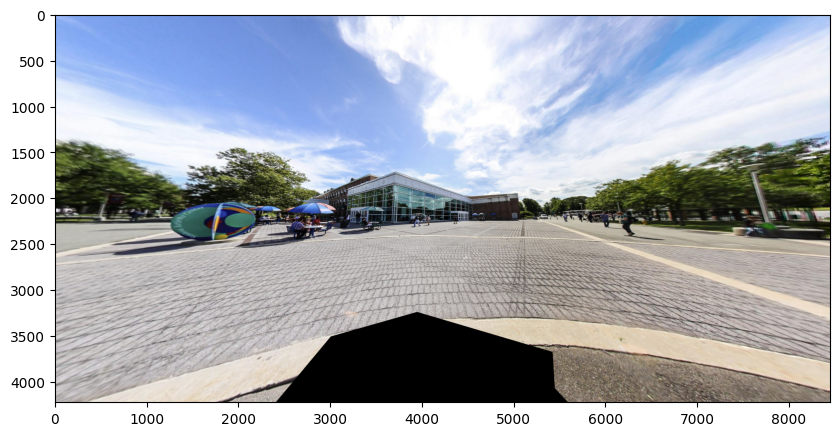

In [12]:
plt.figure(figsize=(10,20));
plt.imshow(cv2.cvtColor(main_image, cv2.COLOR_BGR2RGB));

In [13]:
cv2.imwrite('results/stitched.png', main_image)

True

## Submission guidelines
---

Plagiarism: plagiarism is strictly forbidden.   
Note: Please be advised that uploading your homework assignments to public platforms, such as GitHub, is STRICTLY PROHIBITED. Sharing your homework solutions in this manner (even after the course completion) constitutes a violation of academic integrity and will be treated as such.

